In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
df = pd.read_csv("CAR_DETAILS_FROM_CAR_DEKHO.csv")

In [170]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [171]:
df.shape

(4340, 8)

In [172]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [173]:
## Check Missing values or Null Values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [174]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [175]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [176]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [177]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [178]:
final_dataset['current_year']=2022

In [179]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [180]:
final_dataset['no_years_old'] = final_dataset['current_year'] - final_dataset['year']

In [181]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_years_old
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [182]:
final_dataset.drop(['year','current_year'],axis=1,inplace=True)

In [183]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years_old
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [184]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [185]:
final_dataset.head()

,selling_price,km_driven,no_years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [186]:
final_dataset.rename(columns = {'seller_type_Trustmark Dealer':'seller_type_TrustmarkDealer','owner_Test Drive Car':'owner_test','owner_Second Owner':'owner_second', 'owner_Third Owner':'owner_third', 'owner_Fourth & Above Owner':'owner_fourth'}, inplace = True)

In [187]:
final_dataset.corr()

,selling_price,km_driven,no_years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_TrustmarkDealer,transmission_Manual,owner_fourth,owner_second,owner_test,owner_third
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_years_old,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_TrustmarkDealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [188]:
#import seaborn as sns

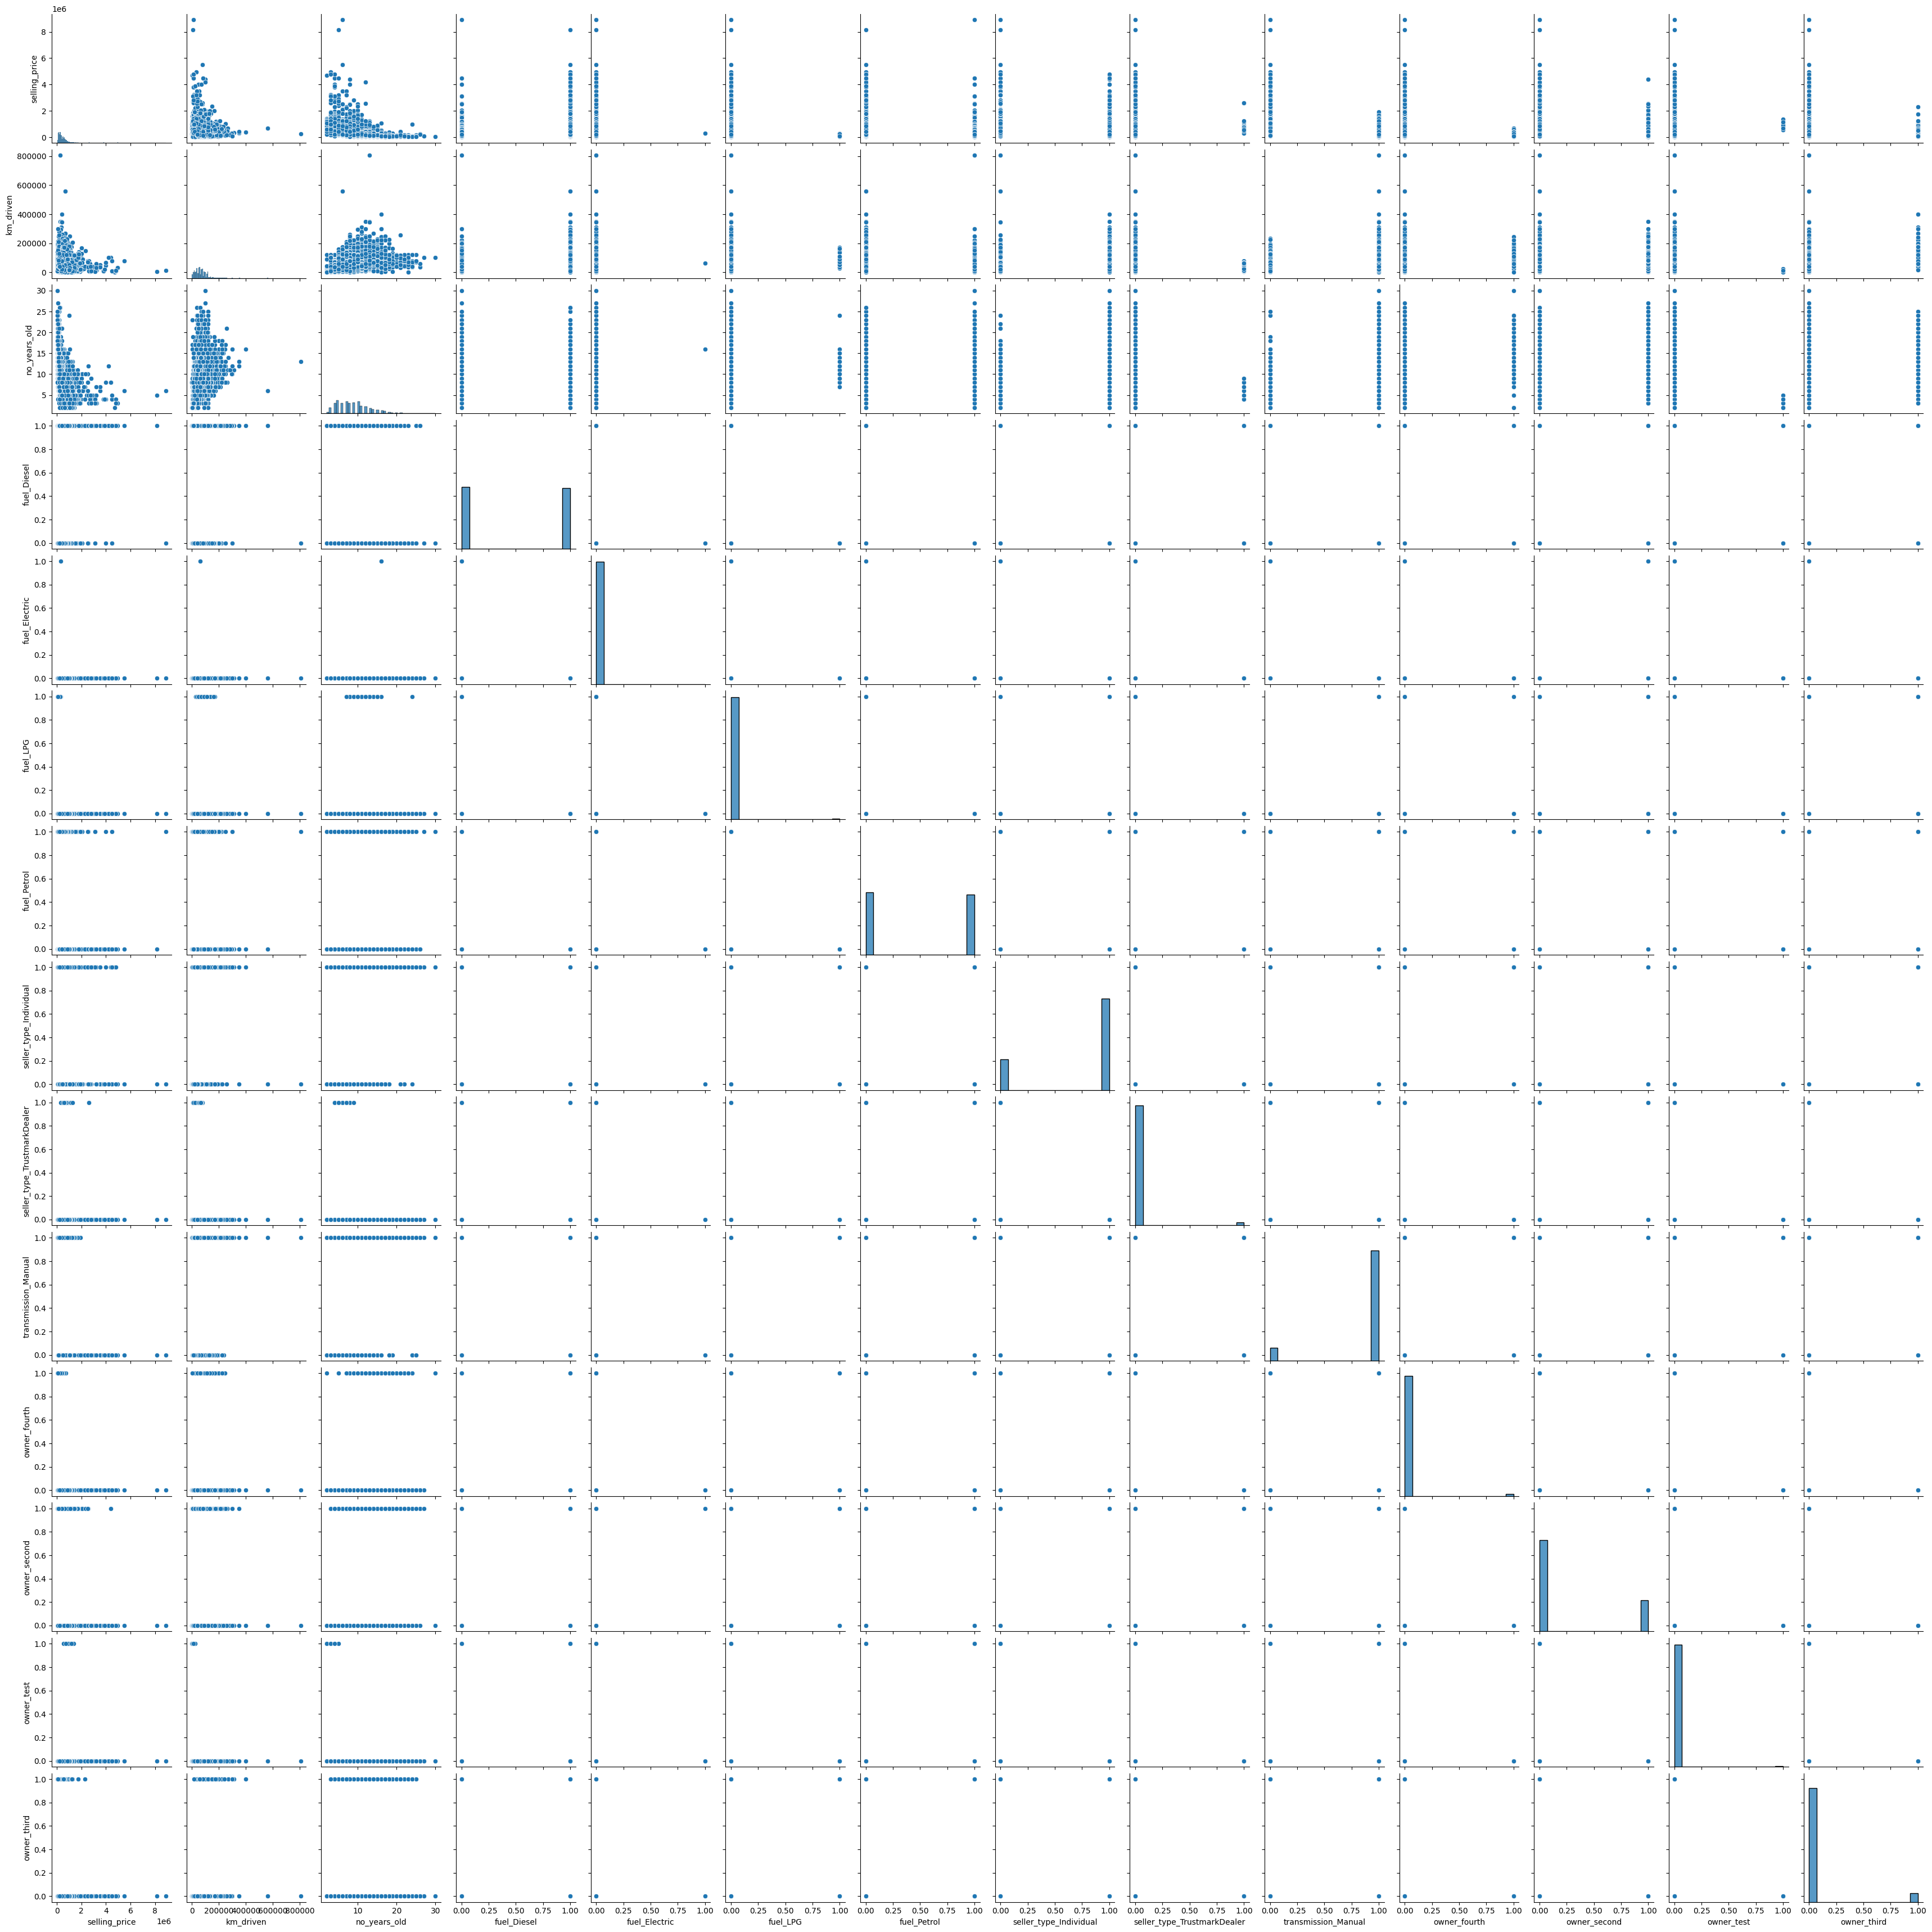

In [189]:
sns.pairplot(final_dataset)

In [190]:
# import matplotlib.pyplot as plt
# %matplotlib inline

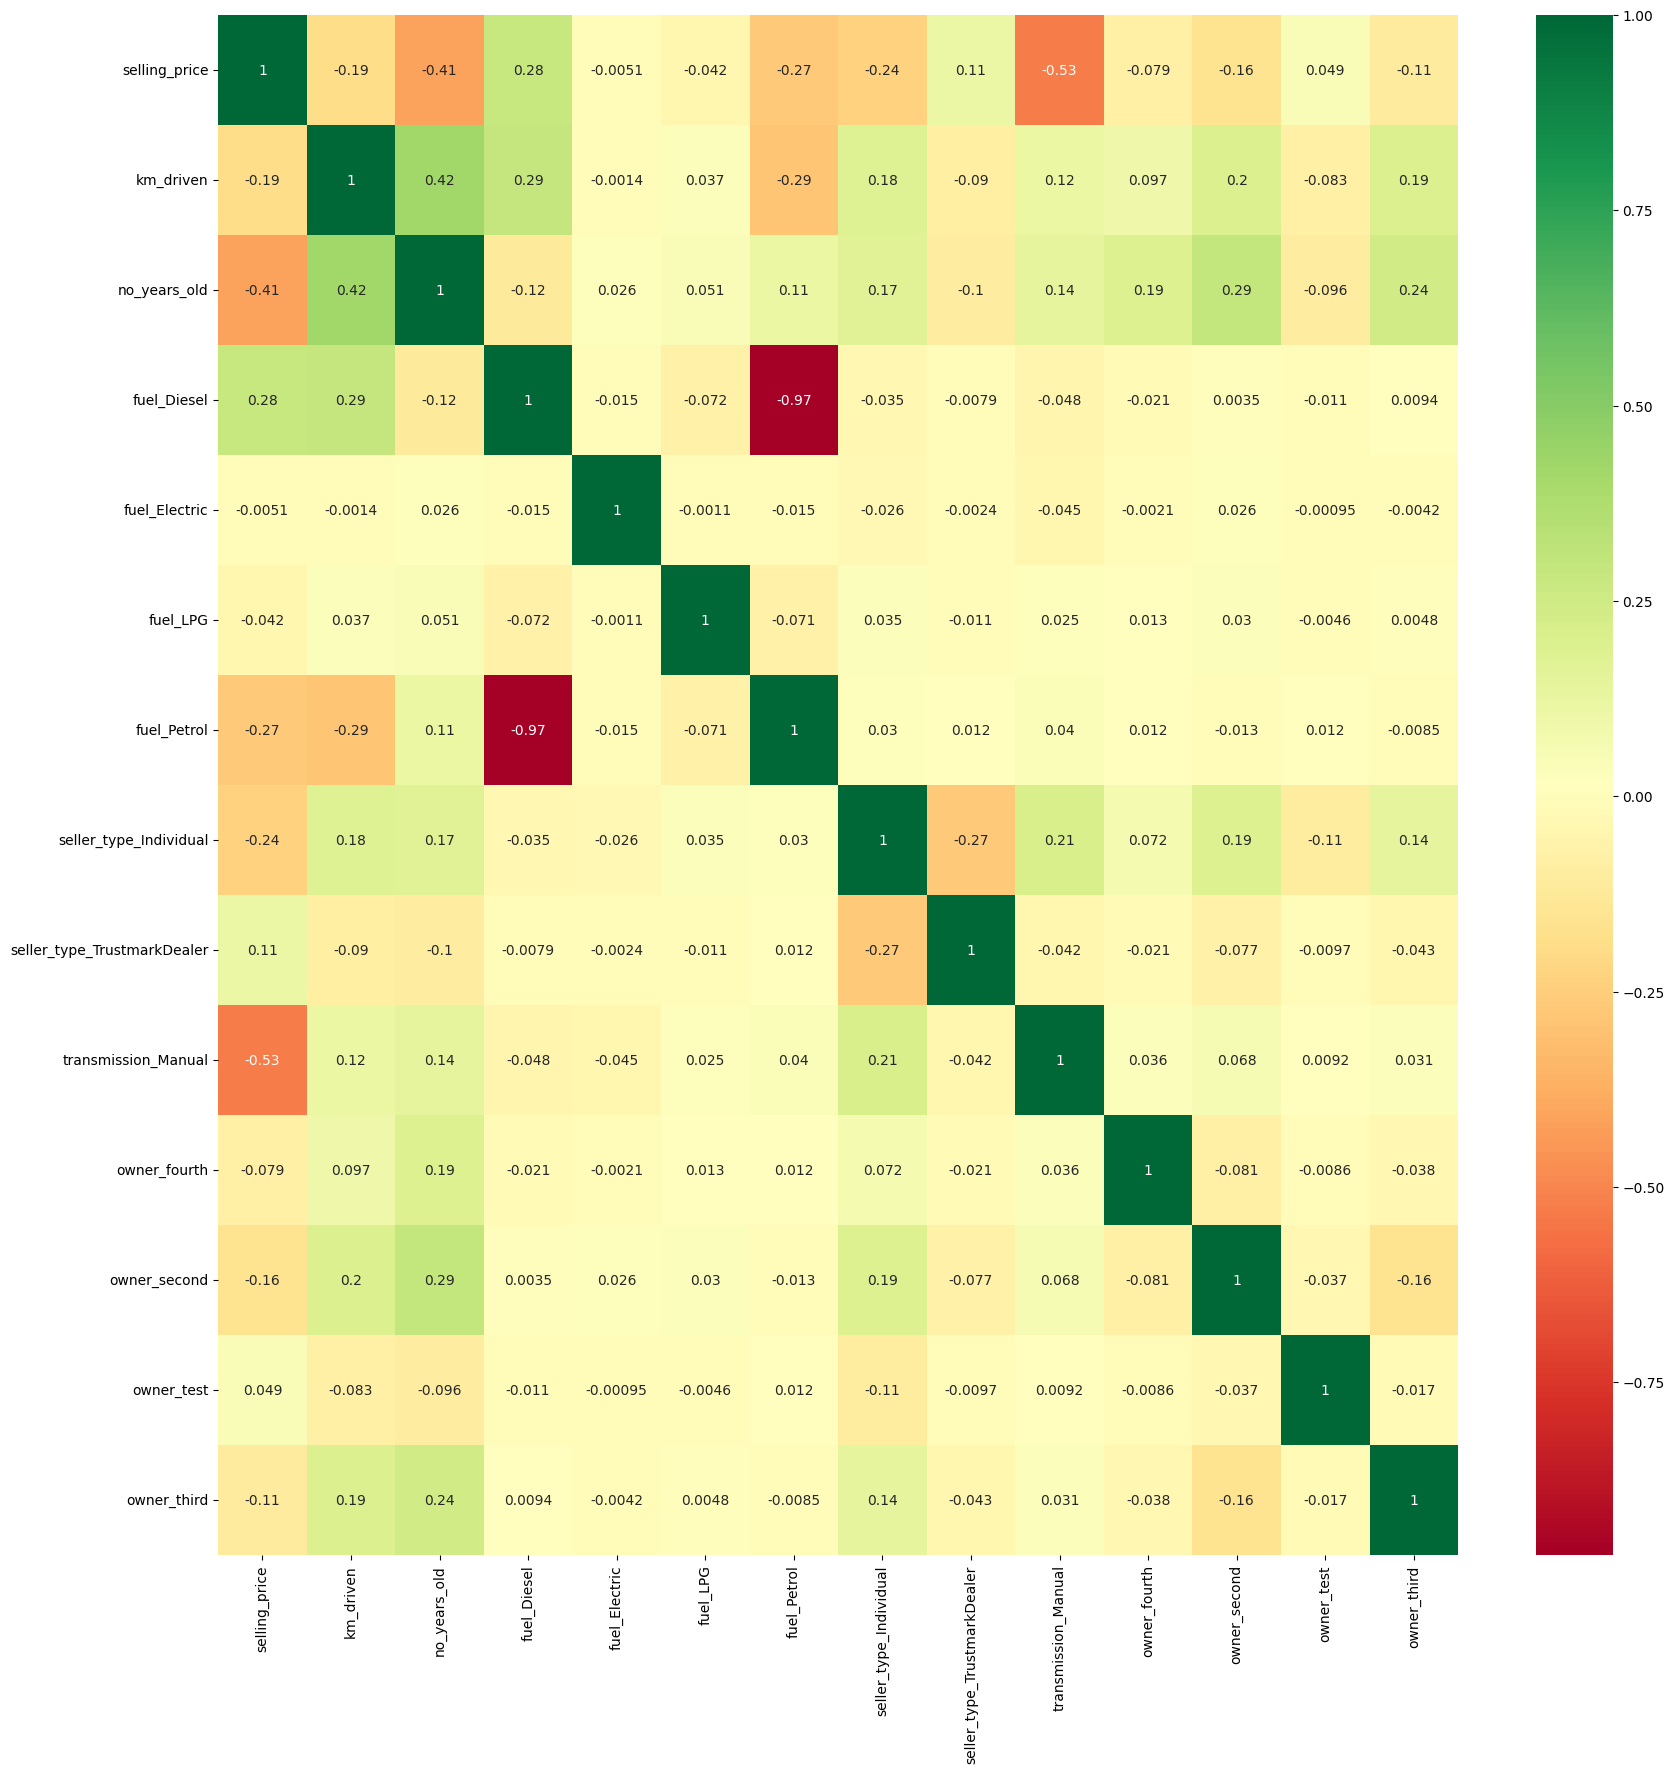

In [191]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plot Heatmap
hm = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [192]:
# Independent and Dependent Features
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [193]:
X.head()

,km_driven,no_years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_TrustmarkDealer,transmission_Manual,owner_fourth,owner_second,owner_test,owner_third
0,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [194]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [195]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [196]:
print(model.feature_importances_)

[2.48195448e-01 2.47337409e-01 1.30112231e-01 2.06249409e-05
 2.48203939e-05 1.90127756e-04 4.41276291e-02 8.90976959e-03
 2.92829122e-01 7.52817024e-04 2.22805627e-02 7.41132338e-04
 4.47830706e-03]


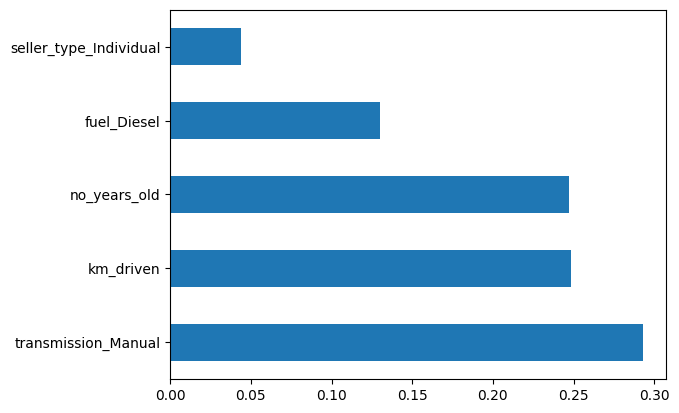

In [197]:
#Plot Gragh of Feature Importance for better visualization
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [199]:
print("X Train: ",X_train.shape)
print("X Test:  ",X_test.shape)
print("\n\nY Train: ",Y_train.shape)
print("Y Test: ",Y_test.shape)

X Train:  (3472, 13)
X Test:   (868, 13)


Y Train:  (3472,)
Y Test:  (868,)


In [200]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [201]:
# Hyperparameters
import numpy as np

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth..append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required to split a leaf node
min_samples_leaf = [1,2,5,10]

In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
#Creating the Random Grid
random_grid = {'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [204]:
# Using random_grid to search for best hyperparameter

#First creating base model to tune
rf = RandomForestRegressor()

In [205]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [206]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.8s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.1s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.8s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.2s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.5s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.1s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_feat

/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.2s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.1s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.0s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.5s


/Users/ar/opt/anaconda3/envs/carpredkaggle/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [207]:
pred = rf_random.predict(X_test)

In [208]:
pred

array([ 168528.74557641,  576145.83251883,  998687.43676638,
        391623.91289331,  524587.53456119,  512476.24717232,
        179052.99059205,  600733.87958853,  397716.04306546,
       1162306.64713698,  200648.2389226 ,  598584.48744333,
       1072325.39114719,  218977.33755243,  520669.54343211,
        130050.43163552,  133421.98377959,  446213.78711909,
        309419.8271438 ,  134540.97733254,  179052.99059205,
        361247.89936324,  337321.36809453,  443345.47007478,
        562389.91468276,  224931.06630885,  183784.91944153,
        284269.4674199 ,  311413.83609309,  935143.51909917,
        112698.22505392,  654839.63168369,  950289.64038426,
        871265.46285882,  900838.15187864,  315910.72920525,
        339293.12714564,   86896.07279851,  129078.72015788,
        520512.61372842,  307780.25187215,  550426.84784392,
        266719.9565706 ,  747831.14551352,  310786.54682133,
        118689.38344468,  691467.33933087,  183419.887547  ,
        488627.26012164,

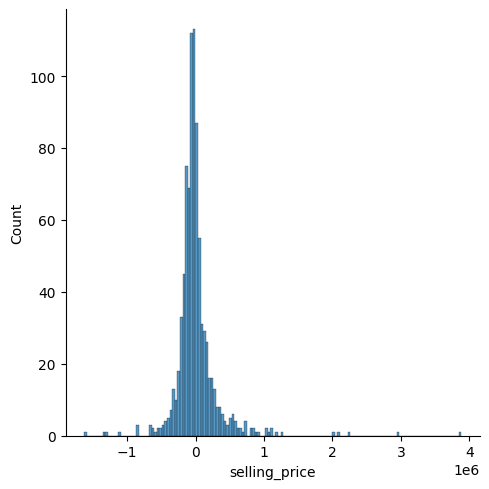

In [209]:
sns.displot(Y_test-pred)

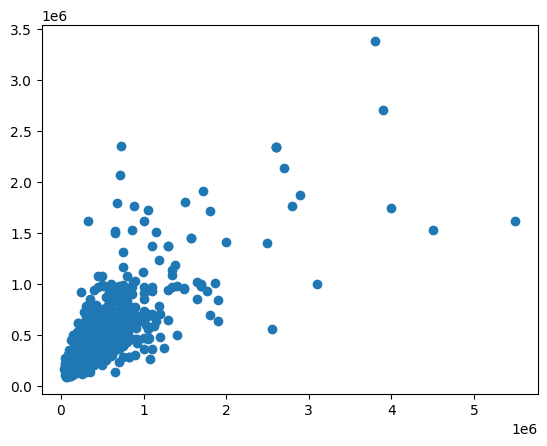

In [210]:
plt.scatter(Y_test, pred)

In [211]:
import pickle 

#Open the file where we want to store the data
file = open('rf_CarPricePredKaggle.pkl', 'wb')

#Dumping info to that file
pickle.dump(rf_random,file)

In [212]:
X.columns

Index(['km_driven', 'no_years_old', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_TrustmarkDealer',
       'transmission_Manual', 'owner_fourth', 'owner_second', 'owner_test',
       'owner_third'],
      dtype='object')

In [214]:
X.columns

Index(['km_driven', 'no_years_old', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_TrustmarkDealer',
       'transmission_Manual', 'owner_fourth', 'owner_second', 'owner_test',
       'owner_third'],
      dtype='object')

In [215]:
X_test.head()

,km_driven,no_years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_TrustmarkDealer,transmission_Manual,owner_fourth,owner_second,owner_test,owner_third
1368,143000,15,0,0,0,1,1,0,1,0,0,0,1
2417,100000,6,1,0,0,0,1,0,1,0,0,0,0
2323,22000,4,0,0,0,1,1,0,0,0,0,0,0
2964,296823,10,1,0,0,0,1,0,1,0,0,0,0
533,65000,8,1,0,0,0,0,0,1,0,0,0,0
